<div style="text-align: center;">
    <hr>
    <h2>Prapemrosesan & Rekayasa Data - IBDA3111</h2>
    <h3>UTS - Students Performance in Exams</h3>
    <h4>Victor Chendra - <b>202000338</b></h4>
    <hr>
</div>

<div>
    <h4>Description: </h4> 
    <ol>
        <li>Masalah yang akan diselesaikan</li>
        <ol type="a">
            <li>How effective is the test preparation course? </li>
            <li>Which major factors contribute to test outcomes? </li>
            <li>What would be the best way to improve student scores on each test? </li>
            <li>What patterns and interactions in the data can you find?</li>
        </ol>
        <br>
        <li>Deskripsi singkat dataset</li>
        <ul style="list-style-type:none;">
            <li>Students Performance in Exams dataset adalah sebuah dataset yang menggambarkan tentang peforma ujian siswa. Dalam dataset berisikan tentang nilai-nilai ujian siswa di sekolah. Adapun tabel-tabel yang terdapat di dalam dataset. (exams.csv)<br><br>
            Terdapat 8 kolom, 5 string 3 integers dan 1000 baris data. Dataset ini ingin memberikan gambaran, apakah pengaruh latar belakang orang tua, persiapan ujian, dan lain-lain terhadap kinerja ujian siswa.
            </li>
        </ul>
        <br>
        <li>Sumber dataset</li>
        <ul style="list-style-type:none;">
            <li>Dataset diperoleh dari kaggle.com <br>
            <a href="https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams">https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams</a></li>
        </ul>
        <br>
        <li>Cara memperoleh dataset</li>
        <ul style="list-style-type:none;">
            <li>Dataset diperoleh dengan cara mengunduh dari website.</li>
        </ul>
    </ol>
</div>


### Library

In [1]:
# Import library needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Load and check dataset

In [2]:
# Load dataset
df = pd.read_csv('exams.csv', delimiter=',')

# Show dataset
# pd.set_option('display.max_rows', None) # display all rows dataset
display(df.head(5))

# Dataset shape
print(f"Rows   : {df.shape[0]}\nColumns: {df.shape[1]}")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Rows   : 1000
Columns: 8


In [3]:
# Check the datatype for all the column values
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
# Check unique values columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [5]:
# Let's check if the data has some missing values
print(f"Check if the data has some missing values")
df.isnull().sum()


Check if the data has some missing values


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

↑ There are no missing values in the dataset* ↑

In [6]:
# Let's check if the values of the first 5 columns numerical or categirical
for i in range(5):
    print(f"{df[df.columns[i]].value_counts()}\n")


male      517
female    483
Name: gender, dtype: int64

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

standard        652
free/reduced    348
Name: lunch, dtype: int64

none         665
completed    335
Name: test preparation course, dtype: int64



↑↑↑ We can see from the above that the first 5 columns are categorical variables. Then, the rest columns are numerical variables.


In [7]:
df.iloc[:, 5:].describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


↑↑ Let's see the statistic presentation using .describe()

### 1. Data cleaning

##### 1. Delete duplicated rows

In [8]:
# Delete duplicated rows
dups = df.duplicated()
print(f"Duplicated rows:")
print(dups.any())
print(df[dups])

print(f"\nShape before delete:  {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after delete :  {df.shape}\n")


Duplicated rows:
True
    gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  

Shape before delete:  (1000, 8)
Shape after delete :  (999, 8)



##### 2. Identifikasi Pencilan lalu diimputasi ke nilai lower bound

Outlier
    Math score    = [23, 13, 13]
    Writing score = [28, 29, 27, 28, 31, 29]
    Reading score = [24, 23, 26, 23]


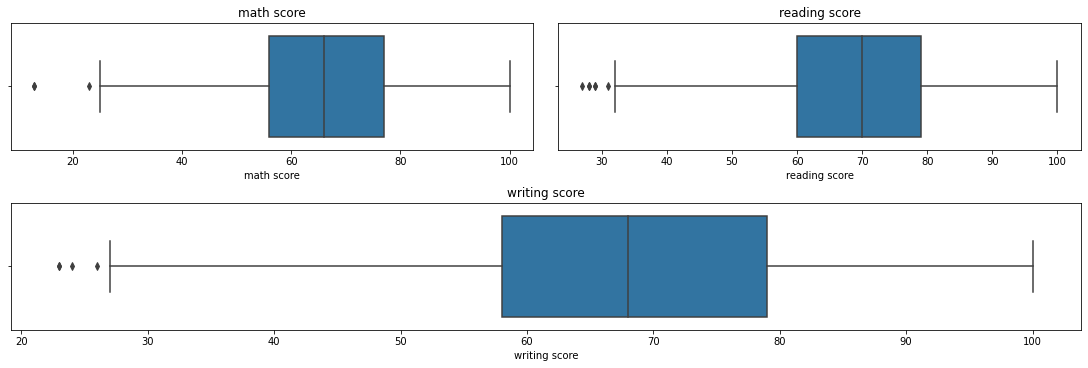

In [9]:
# This func return upper & lower bound from dataset column
def identify_outlier(datacolumn):
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range, upper_range


# Plot to boxplot so we can see the outlier data
def display_boxplot():
    figure, ax = plt.subplots(1,2, constrained_layout=True, figsize=(15, 5))

    s = 1
    for i in range(len(df.columns)):
        if i == 7:
            plt.subplot(2, 2, (s, s+1))
            plt.title(df.columns[i])
            sns.boxplot(x=df.iloc[:, i])
            s += 1
            continue

        if i >= 5:        
            plt.subplot(2, 2, s)
            plt.title(df.columns[i])
            sns.boxplot(x=df.iloc[:, i])
            s += 1


# Take the bounderies value 
math_score = identify_outlier(df.iloc[:, 5])
reading_score = identify_outlier(df.iloc[:, 6])
writing_score = identify_outlier(df.iloc[:, 7])

# Capture outlier (lower bound)
outlier_ms = [x for x in df.iloc[:, 5] if x < math_score[0]]
outlier_rs = [x for x in df.iloc[:, 6] if x < reading_score[0]]
outlier_ws = [x for x in df.iloc[:, 7] if x < writing_score[0]]

print(f"Outlier")
print(f"    Math score    = {outlier_ms}")
print(f"    Writing score = {outlier_rs}")
print(f"    Reading score = {outlier_ws}")

display_boxplot()


↑↑ From boxplot above.. we can see that there is an outlier in our dataset

Outlier
    Math score    = []
    Writing score = []
    Reading score = []


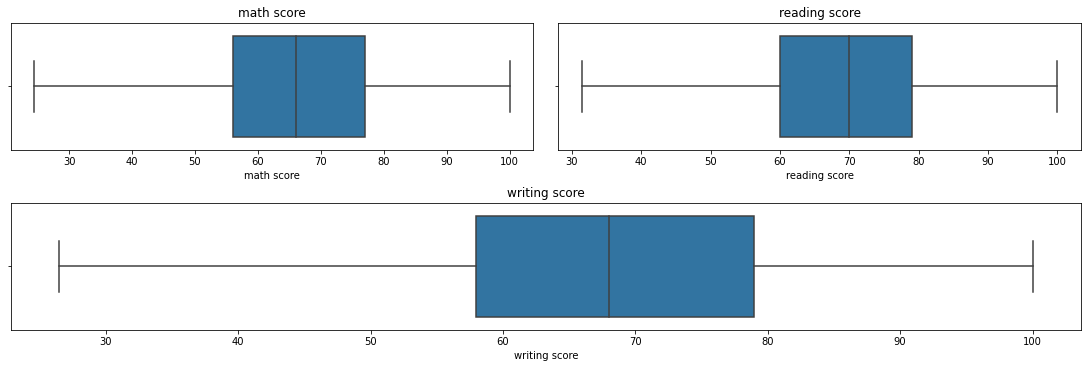

In [10]:
# Function to impute to our dataset
def impute_outlier_to_lower_bound_value(df: pd.DataFrame, bounderies: tuple, n_col: int):
    for i in range(df.shape[0]):
        if df.iloc[i, n_col] <= bounderies[0]:
            df.iloc[i, n_col] = bounderies[0]
    return

impute_outlier_to_lower_bound_value(df, math_score, 5)
impute_outlier_to_lower_bound_value(df, reading_score, 6)
impute_outlier_to_lower_bound_value(df, writing_score, 7)

# Take the bounderies value 
math_score = identify_outlier(df.iloc[:, 5])
reading_score = identify_outlier(df.iloc[:, 6])
writing_score = identify_outlier(df.iloc[:, 7])

# Capture outlier (lower bound)
outlier_ms = [x for x in df.iloc[:, 5] if x < math_score[0]]
outlier_rs = [x for x in df.iloc[:, 6] if x < reading_score[0]]
outlier_ws = [x for x in df.iloc[:, 7] if x < writing_score[0]]

print(f"Outlier")
print(f"    Math score    = {outlier_ms}")
print(f"    Writing score = {outlier_rs}")
print(f"    Reading score = {outlier_ws}")

display_boxplot()


↑ ↑ Now, we have done imputing the outlier data to it's lower bound value (so no more outlier)

### 2. Features selection

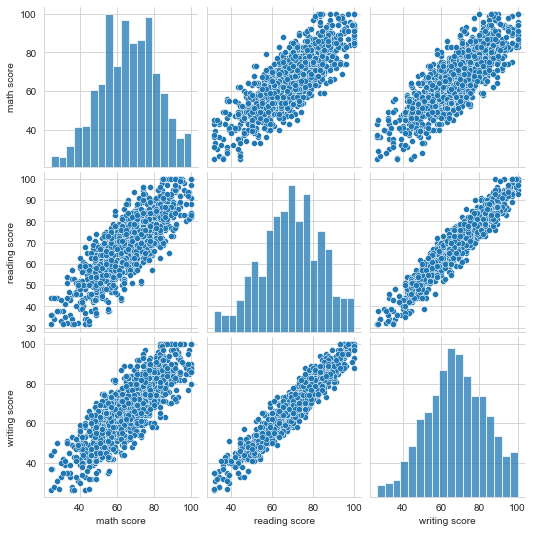

In [12]:
# Kode berikut membangkitkan data acak multidimensi
x = df.iloc[:, -3:-1]
y = df.iloc[:, -1]

d = {
    "math score" : df.iloc[:, -3],
    "reading score" : df.iloc[:, -2],
    "writing score":df.iloc[:, -1]
}

# Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
sns.set_style("whitegrid")
sns.pairplot(df[list(df.columns)])
